In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import widgets, interactive

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv',low_memory=False)

In [3]:
df.head(1)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN


In [4]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [5]:
df.rename(columns={"host id": "host_id", 
                   "host name": "host_name",
                   "neighbourhood group": "neighbourhood_group",
                   "service fee": "service_fee",
                    "minimum nights": "min_nights",
                    "number of reviews": "number_of_reviews",
                    "last review": "last_review",
                    "reviews per month": "reviews_per_month",
                   "review rate number": "avg_review",
                   "calculated host listings count": "calculated_host_listings_count",
                   "availability 365": "availability_365"
                  },inplace=True)

In [6]:
df.rename(str.upper, axis='columns',inplace=True)

In [7]:
df['NEIGHBOURHOOD_GROUP'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [8]:
df.replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'}, inplace=True)

In [9]:
df.isnull().sum()

ID                                     0
NAME                                 250
HOST_ID                                0
HOST_IDENTITY_VERIFIED               289
HOST_NAME                            406
NEIGHBOURHOOD_GROUP                   29
NEIGHBOURHOOD                         16
LAT                                    8
LONG                                   8
COUNTRY                              532
COUNTRY CODE                         131
INSTANT_BOOKABLE                     105
CANCELLATION_POLICY                   76
ROOM TYPE                              0
CONSTRUCTION YEAR                    214
PRICE                                247
SERVICE_FEE                          273
MIN_NIGHTS                           409
NUMBER_OF_REVIEWS                    183
LAST_REVIEW                        15893
REVIEWS_PER_MONTH                  15879
AVG_REVIEW                           326
CALCULATED_HOST_LISTINGS_COUNT       319
AVAILABILITY_365                     448
HOUSE_RULES     

In [10]:
df.nunique()

ID                                102058
NAME                               61281
HOST_ID                           102057
HOST_IDENTITY_VERIFIED                 2
HOST_NAME                          13190
NEIGHBOURHOOD_GROUP                    5
NEIGHBOURHOOD                        224
LAT                                21991
LONG                               17774
COUNTRY                                1
COUNTRY CODE                           1
INSTANT_BOOKABLE                       2
CANCELLATION_POLICY                    3
ROOM TYPE                              4
CONSTRUCTION YEAR                     20
PRICE                               1151
SERVICE_FEE                          231
MIN_NIGHTS                           153
NUMBER_OF_REVIEWS                    476
LAST_REVIEW                         2477
REVIEWS_PER_MONTH                   1016
AVG_REVIEW                             5
CALCULATED_HOST_LISTINGS_COUNT        78
AVAILABILITY_365                     438
HOUSE_RULES     

In [11]:
df.LICENSE.unique()

array([nan, '41662/AL'], dtype=object)

In [12]:
df.shape

(102599, 26)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop(['LICENSE','COUNTRY','COUNTRY CODE'],inplace=True,axis=1)

In [15]:
df['duplicado']= df.duplicated(subset=['HOST_ID'],keep=False)

In [16]:
df_2= df[df['duplicado']==True]

In [17]:
df_2.value_counts('HOST_ID')

HOST_ID
29531702698    2
dtype: int64

In [18]:
df[df['HOST_ID']==29531702698]

,ID,NAME,HOST_ID,HOST_IDENTITY_VERIFIED,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,LAT,LONG,INSTANT_BOOKABLE,...,SERVICE_FEE,MIN_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,AVG_REVIEW,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365,HOUSE_RULES,duplicado
23397,13923499,Magnificent Lakeview Home on Kissena Park in NYC,29531702698,verified,Ann,Queens,Flushing,40.74982,-73.80610,True,...,$208,3.0,0.0,NaN,NaN,2.0,6.0,256.0,NaN,True
42960,24728144,NaN,29531702698,verified,Seth,Brooklyn,Williamsburg,40.71867,-73.96163,True,...,$228,2.0,1.0,5/19/2019,0.59,3.0,1.0,44.0,This is a non smoking apartment. No l,True


In [19]:
df.dropna(subset=['AVG_REVIEW','NUMBER_OF_REVIEWS','LAT','LONG'],inplace=True)

df.head(1)

,ID,NAME,HOST_ID,HOST_IDENTITY_VERIFIED,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,LAT,LONG,INSTANT_BOOKABLE,...,SERVICE_FEE,MIN_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,AVG_REVIEW,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365,HOUSE_RULES,duplicado
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,False


In [20]:
df.drop(['duplicado'],inplace=True,axis=1)

In [21]:
df.isnull().sum()

ID                                    0
NAME                                242
HOST_ID                               0
HOST_IDENTITY_VERIFIED              275
HOST_NAME                           397
NEIGHBOURHOOD_GROUP                  27
NEIGHBOURHOOD                        16
LAT                                   0
LONG                                  0
INSTANT_BOOKABLE                     91
CANCELLATION_POLICY                  76
ROOM TYPE                             0
CONSTRUCTION YEAR                   204
PRICE                               247
SERVICE_FEE                         273
MIN_NIGHTS                          379
NUMBER_OF_REVIEWS                     0
LAST_REVIEW                       15669
REVIEWS_PER_MONTH                 15656
AVG_REVIEW                            0
CALCULATED_HOST_LISTINGS_COUNT      251
AVAILABILITY_365                    380
HOUSE_RULES                       51570
dtype: int64

In [22]:
df.PRICE

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102053      $696 
102054      $909 
102055      $387 
102056      $848 
102057    $1,128 
Name: PRICE, Length: 101549, dtype: object

In [23]:
price_review=df.groupby(['PRICE'])['AVG_REVIEW'].agg('mean').reset_index()
price_review['PRICE'] = price_review['PRICE'].str.replace(',', '').str.replace('$', '').astype(int)
price_review.sort_values(by='PRICE',
                         inplace=True,
                         ignore_index=True)
price_review

C:\Users\Zé\AppData\Local\Temp\ipykernel_7120\3265200479.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_review['PRICE'] = price_review['PRICE'].str.replace(',', '').str.replace('$', '').astype(int)


,PRICE,AVG_REVIEW
0,50,3.204301
1,51,3.000000
2,52,3.285714
3,53,3.384615
4,54,3.171875
...,...,...
1146,1196,3.179487
1147,1197,3.253165
1148,1198,3.272727
1149,1199,3.039216


<Axes: xlabel='PRICE', ylabel='AVG_REVIEW'>

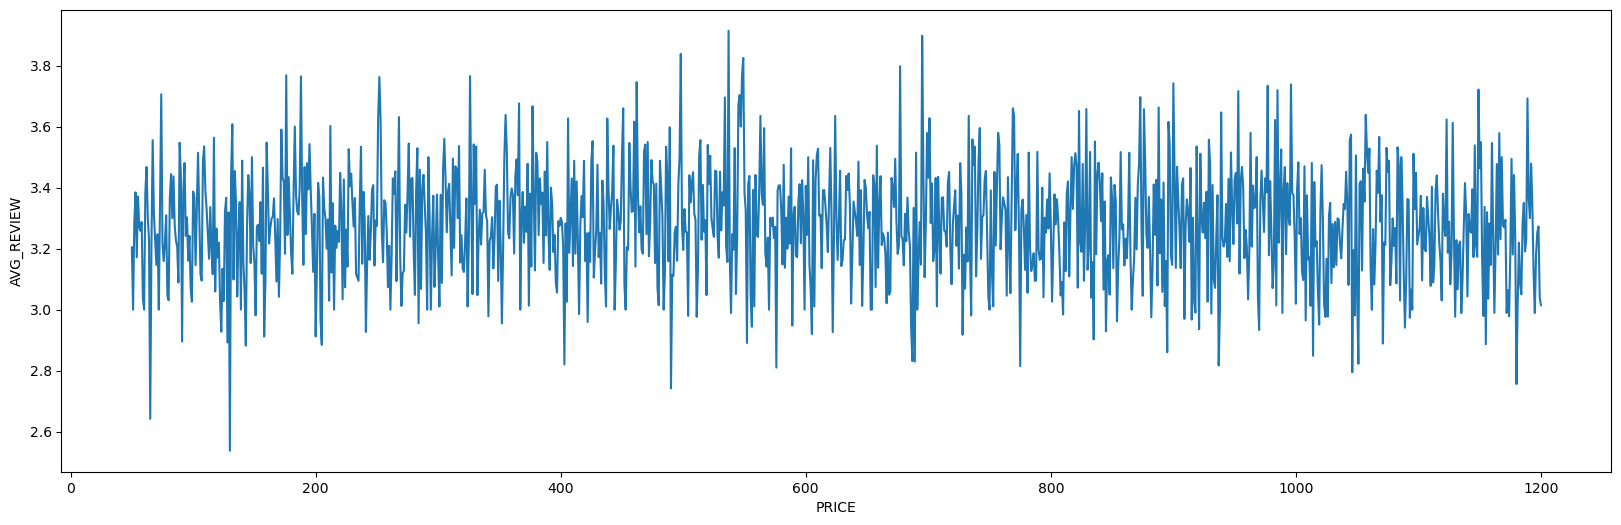

In [24]:
plt.figure(figsize=(20,6))
sns.lineplot(data=price_review, 
                x="PRICE",
                y="AVG_REVIEW"
            )

C:\Users\Zé\AppData\Local\Temp\ipykernel_7120\1962300077.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PRICE'] = df['PRICE'].str.replace(',', '').str.replace('$', '').astype(float)


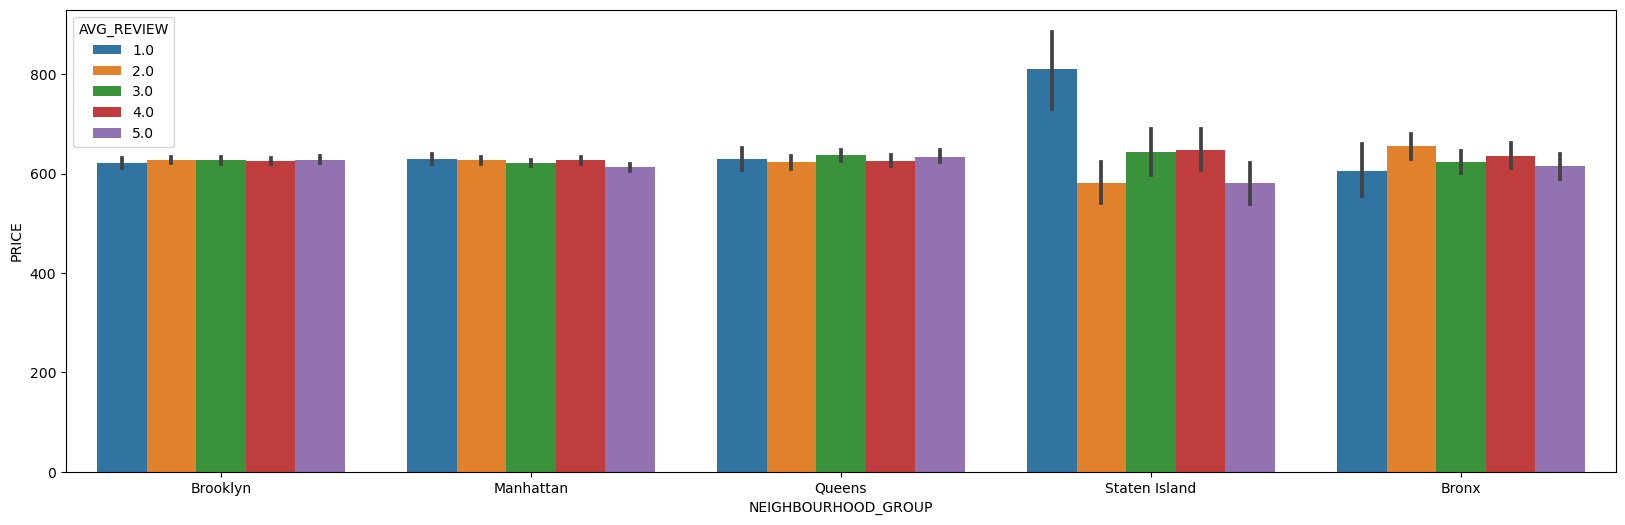

In [25]:
plt.figure(figsize=(20,6))
df['PRICE'] = df['PRICE'].str.replace(',', '').str.replace('$', '').astype(float)
sns.barplot(data=df,
       x='NEIGHBOURHOOD_GROUP',
       y='PRICE', 
       hue='AVG_REVIEW'
       )
plt.show()

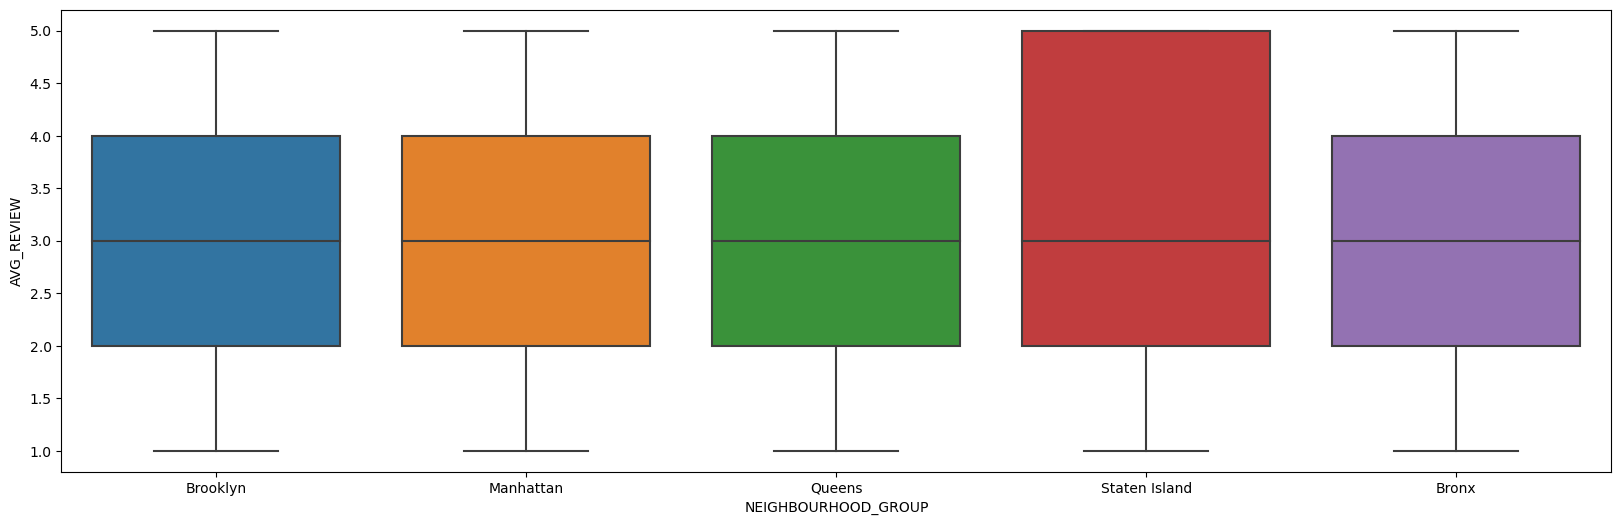

In [26]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df,
       x='NEIGHBOURHOOD_GROUP',
       y='AVG_REVIEW', 
       )
plt.show()

In [27]:
df.head(1)

,ID,NAME,HOST_ID,HOST_IDENTITY_VERIFIED,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,LAT,LONG,INSTANT_BOOKABLE,...,PRICE,SERVICE_FEE,MIN_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,AVG_REVIEW,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365,HOUSE_RULES
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...


In [28]:
#df_Brooklyn=df[df['NEIGHBOURHOOD_GROUP'] == 'Brooklyn']
df_byBrooklyn=df.groupby(['NEIGHBOURHOOD_GROUP','NEIGHBOURHOOD'])['AVG_REVIEW','PRICE'].agg('mean').reset_index()
df_byBrooklyn.head(1)

C:\Users\Zé\AppData\Local\Temp\ipykernel_7120\3643360599.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_byBrooklyn=df.groupby(['NEIGHBOURHOOD_GROUP','NEIGHBOURHOOD'])['AVG_REVIEW','PRICE'].agg('mean').reset_index()


,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,AVG_REVIEW,PRICE
0,Bronx,Allerton,3.294737,641.968085


In [29]:
from IPython.display import display

In [39]:
# Define the function to update the plot
def update_plot(NEIGHBOURHOOD_GROUP,PARAMETERS):
    
    fig, ax = plt.subplots(figsize=(30, 8))
    
    # Clear the previous plot
    ax.clear()
    
    # Filter the data based on the selected day
    filtered_df = df_byBrooklyn[df_byBrooklyn['NEIGHBOURHOOD_GROUP']== NEIGHBOURHOOD_GROUP ]
    
    Mean = filtered_df.groupby('NEIGHBOURHOOD_GROUP')[PARAMETERS].mean().reset_index()
    Mean = Mean[Mean['NEIGHBOURHOOD_GROUP']== NEIGHBOURHOOD_GROUP]
    Mean = Mean[PARAMETERS][0]
    
    highlight_colour = 'm'
    non_highlight_colour = 'c'

    #filtered_df['colours'] = filtered_df[PARAMETERS].apply(lambda x: highlight_colour if x >= Mean else non_highlight_colour)
    filtered_df.loc[filtered_df[PARAMETERS] >= Mean, 'colours'] = highlight_colour
    filtered_df.loc[filtered_df[PARAMETERS] < Mean, 'colours'] = non_highlight_colour
    #print(filtered_df['colours'])
    
    color_palette = {c: c for c in filtered_df['colours'].unique()}
    
    sns.barplot(data=filtered_df,
                x="NEIGHBOURHOOD", 
                y=df_byBrooklyn[PARAMETERS],
                palette=filtered_df['colours'],
               )
    
    ax.spines[['right', 'top']].set_visible(False) 
    
    # label each bar in barplot
    for p in ax.patches:
    
        # get the height of each bar
        height = p.get_height()
        # adding text to each bar
        ax.text(
        x = p.get_x()+(p.get_width()/2),         # x-coordinate position of data label, padded to be in the middle of the bar
        y = height* 1.01,                          # y-coordinate position of data label, padded 100 above bar
        s = '{:.1f}'.format(height),             # data label, formatted to ignore decimals
        ha = 'center',                           # sets horizontal alignment (ha) to center
        color = 'black'
        )
        
    ax.axhline(y= Mean, 
               zorder=0, 
               color='grey', 
               ls='--', 
               lw=2,
              alpha = 0.4)    
    
    
    plt.xlabel('Neibur')
    plt.ylabel('Average Review')
    #plt.title(df_byBrooklyn[NEIGHBOURHOOD_GROUP])
    plt.xticks(rotation=80)
    plt.show()


List_NEIGHBOURHOOD_GROUP = list(df_byBrooklyn['NEIGHBOURHOOD_GROUP'].unique())
PARAMETERS_Values = ['AVG_REVIEW','PRICE']

Neibur_slide=widgets.Dropdown(
    options=List_NEIGHBOURHOOD_GROUP,
    value=List_NEIGHBOURHOOD_GROUP[0],
    description='City:',
    disabled=False,
)
Parameters_slide=widgets.Dropdown(
    options=PARAMETERS_Values,
    value=PARAMETERS_Values[0],
    description='Parameters:',
    disabled=False,
)
# Link slider to update function
widgets.interact(update_plot, 
                 NEIGHBOURHOOD_GROUP=Neibur_slide,
                 PARAMETERS= Parameters_slide)

interactive(children=(Dropdown(description='City:', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Stat…

<function __main__.update_plot(NEIGHBOURHOOD_GROUP, PARAMETERS)>

In [31]:
df.head(5)

,ID,NAME,HOST_ID,HOST_IDENTITY_VERIFIED,HOST_NAME,NEIGHBOURHOOD_GROUP,NEIGHBOURHOOD,LAT,LONG,INSTANT_BOOKABLE,...,PRICE,SERVICE_FEE,MIN_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW,REVIEWS_PER_MONTH,AVG_REVIEW,CALCULATED_HOST_LISTINGS_COUNT,AVAILABILITY_365,HOUSE_RULES
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,...,966.0,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,...,142.0,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,...,620.0,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,...,368.0,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,...,204.0,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [32]:
coord_mean = df.groupby('NEIGHBOURHOOD_GROUP')['LAT','LONG','AVG_REVIEW','PRICE'].mean().reset_index()
coord_mean

C:\Users\Zé\AppData\Local\Temp\ipykernel_7120\1527993752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  coord_mean = df.groupby('NEIGHBOURHOOD_GROUP')['LAT','LONG','AVG_REVIEW','PRICE'].mean().reset_index()


,NEIGHBOURHOOD_GROUP,LAT,LONG,AVG_REVIEW,PRICE
0,Bronx,40.849226,-73.883254,3.331341,629.961423
1,Brooklyn,40.683814,-73.950489,3.258506,626.644103
2,Manhattan,40.765283,-73.974419,3.276897,622.752608
3,Queens,40.728570,-73.867656,3.329217,630.228030
4,Staten Island,40.611614,-74.105278,3.404030,623.167021


In [33]:
#df['Lat_Mean'] = df['NEIGHBOURHOOD_GROUP'].map(coord_mean['LAT'])
#df['Long_Mean'] = df['NEIGHBOURHOOD_GROUP'].map(coord_mean['LONG'])

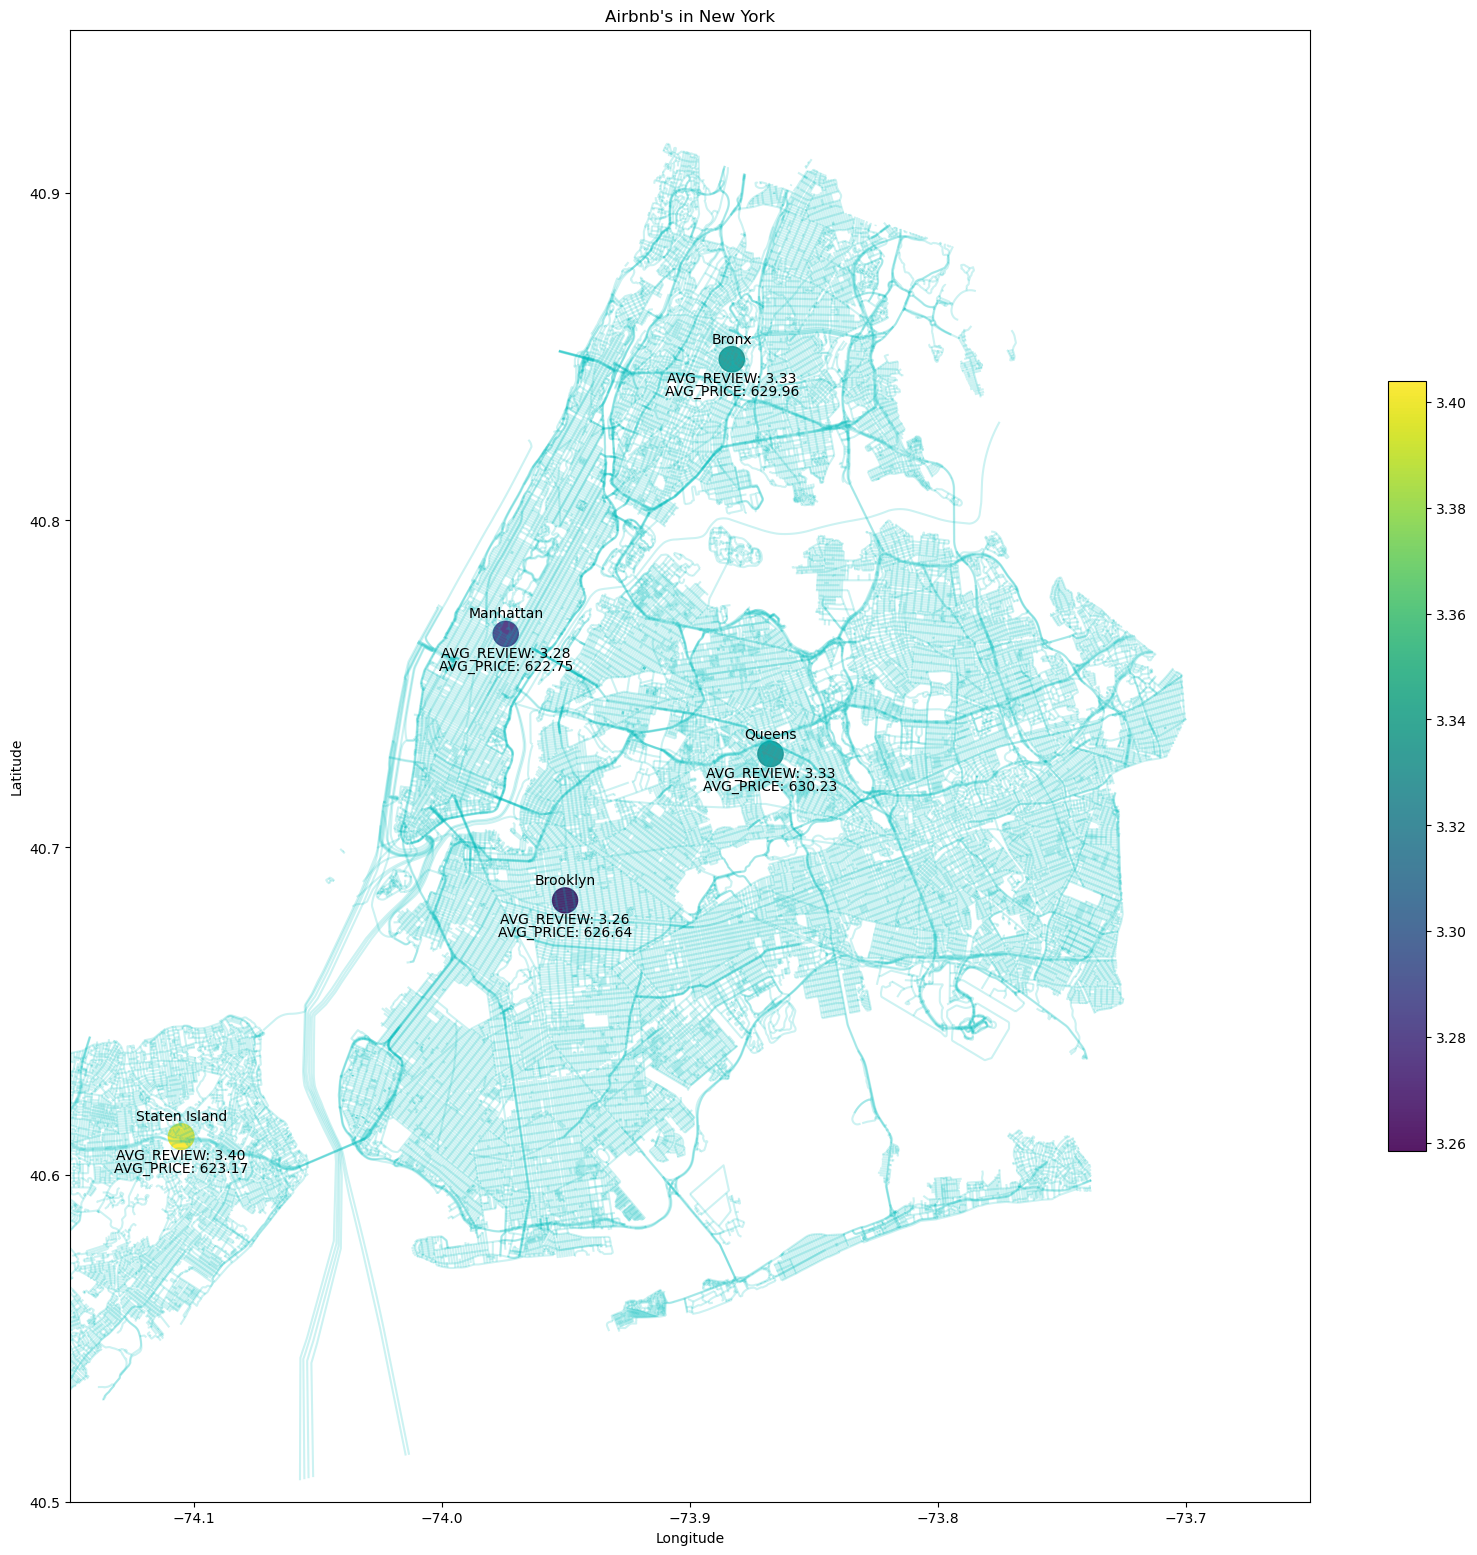

In [36]:
import geopandas as gpd

# Read the shapefile containing world country data
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 20))
#worldmap.plot(ax=ax,color="lightgrey")

streets = gpd.read_file("C:/Users/Zé/HAVARD/EDA's/Airbnb/new_york_hope.shp")

streets.plot(ax=ax, color='c',alpha=0.2)

# Plot the filtered data
x = coord_mean['LONG']
y = coord_mean['LAT']
z = coord_mean['AVG_REVIEW']
scatter = ax.scatter(x,
           y,
           s = z*100,
           c = z, 
           alpha = 0.9, 
           #cmap='blue'
          )

# label each point on the map
for i, row in coord_mean.iterrows():
    ax.text(x = row['LONG'],
            y = row['LAT'] -0.007,
            s = 'AVG_REVIEW: {:.2f}'.format(row['AVG_REVIEW']),
            ha = 'center', 
            color = 'black'
            #fontsize=12
           )
for i, row in coord_mean.iterrows():
    ax.text(x = row['LONG'],
            y = row['LAT'] -0.011,
            s = 'AVG_PRICE: {:.2f}'.format(row['PRICE']),
            ha = 'center', 
            color = 'black'
            #fontsize=12
           )
    
for i, row in coord_mean.iterrows():
    ax.text(x = row['LONG'],
            y = row['LAT'] + 0.005,
            s = row['NEIGHBOURHOOD_GROUP'],
            ha = 'center', 
            color = 'black'
            #fontsize=12
           )
plt.colorbar(scatter,shrink=0.5)
# Show the map
ax.set_title("Airbnb's in New York")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.xlim([-74.15, -73.65])
plt.ylim([40.5, 40.95])
#plt.gcf().set_size_inches(20, 10)
plt.show()

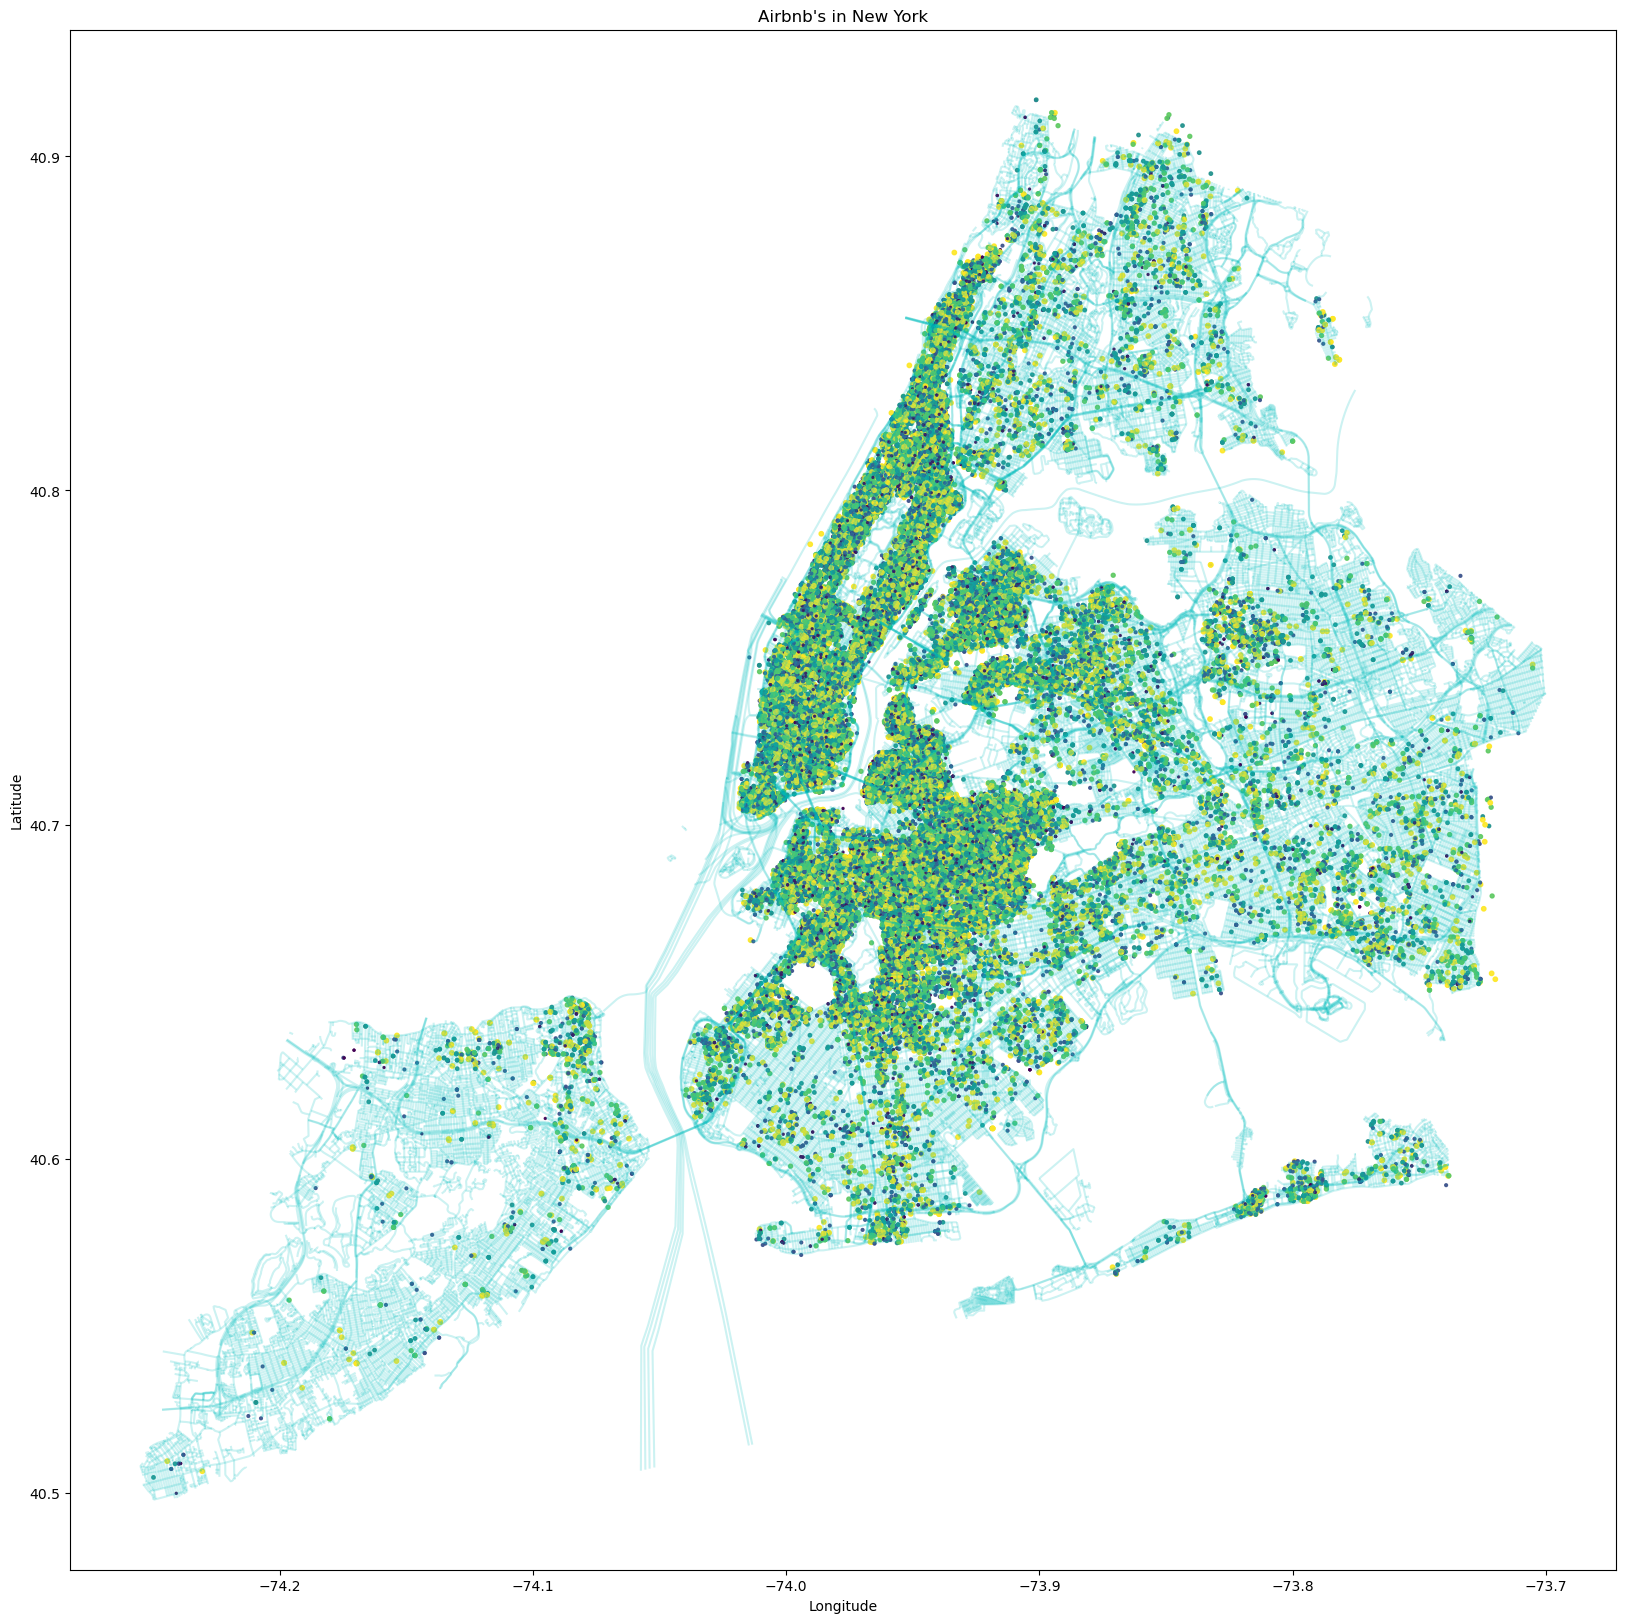

In [37]:
# Read the shapefile containing world country data
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 20))
#worldmap.plot(ax=ax,color="lightgrey")

streets = gpd.read_file("C:/Users/Zé/HAVARD/EDA's/Airbnb/new_york_hope.shp")

streets.plot(ax=ax, color='c',alpha=0.2)

# Plot the filtered data
x = df['LONG']
y = df['LAT']
z = df['AVG_REVIEW']
ax.scatter(x,
            y,
            s=z*2,
            c=z, 
            alpha=0.9, 
            #cmap='blue'
          )

# Show the map
ax.set_title("Airbnb's in New York")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#plt.title("GTA's")
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.xlim([-74.15, -73.65])
#plt.ylim([40.5, 40.95])
#plt.gcf().set_size_inches(20, 10)
plt.show()